In [1]:
import pandas as pd
path = "../data/5examples.csv"
data = pd.read_csv(path)
data

/tmp/ipykernel_600630/1280656970.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,fw,smiles,inchikey,complex,dock_job,config,dock_crystal,supercell,mol_ids,...,opt_lattice,opt_xyz,affinity,affinity_units,affinity_metric,affinity.1,loading,num_si,bindingatoms,dock_lattice
0,134,EMM17A,C[N+](C)(C)CCCCCCCC[N+](C)(C)C,XDZILQXNIZCEDV-UHFFFAOYNA-N,2211911,130330077,montecarlo_docking,536467517,1.0,"[['C[N+](C)(C)CCCCCCCC[N+](C)(C)C', [360, 361,...",...,"[[0.015656, -1.9e-05, -12.375156], [1.5e-05, -...","[[14.0, -11.43006742622, -14.634531951790002, ...",7065779.0,Ha/osda,6.0,-0.082431,5.0,120,-27.052722,"[[0.015656, -1.9e-05, -12.375156], [1.5e-05, -..."
1,69,EMM17B,C[N+](C)(C)CCCCCCCCC[N+](C)(C)C,YQIXJBMRVGLUGE-UHFFFAOYNA-N,2211936,130330102,montecarlo_docking,536351801,1.0,"[['C[N+](C)(C)CCCCCCCCC[N+](C)(C)C', [360, 361...",...,"[[-11.75653, 0.0, 3.811195], [3e-06, -23.16602...","[[14.0, -1.0143089589499998, -14.66478871347, ...",7065370.0,Ha/osda,6.0,-0.099965,4.0,120,-26.245814,"[[-11.75653, 0.0, 3.811195], [3e-06, -23.16602..."
2,108,EMM17A,C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C,MTCUAOILFDZKCO-UHFFFAOYNA-N,2211909,130330075,montecarlo_docking,536399931,2.0,"[['C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C', [720, 72...",...,"[[0.031441, 5e-06, -24.750388], [-1.3e-05, -23...","[[14.0, -11.430103420465, -14.634505035125, -3...",7065630.0,Ha/osda,6.0,-0.113691,7.0,240,-26.118268,"[[0.031441, 5e-06, -24.750388], [-1.3e-05, -23..."
3,70,EMM17B,C[N+](C)(C)CCCCCCCCC[N+](C)(C)C,YQIXJBMRVGLUGE-UHFFFAOYNA-N,2211936,130330102,montecarlo_docking,536351806,1.0,"[['C[N+](C)(C)CCCCCCCCC[N+](C)(C)C', [360, 361...",...,"[[-11.75653, 0.0, 3.811195], [3e-06, -23.16602...","[[14.0, -1.0143089589499998, -14.66478871347, ...",7065371.0,Ha/osda,6.0,-0.090850,4.0,120,-23.852763,"[[-11.75653, 0.0, 3.811195], [3e-06, -23.16602..."
4,204,EMM17C,C[N+](C)(C)CCCCCCCC[N+](C)(C)C,XDZILQXNIZCEDV-UHFFFAOYNA-N,2211963,131100859,montecarlo_docking,558255374,1.0,"[['C[N+](C)(C)CCCCCCCC[N+](C)(C)C', [360, 361,...",...,"[[-0.031579, -2.1e-05, -12.518268], [7e-06, -2...","[[14.0, -13.419078889669999, -8.55258653753, -...",7853298.0,Ha/osda,6.0,-0.087178,4.0,120,-22.888663,"[[-0.031579, -2.1e-05, -12.518268], [7e-06, -2..."


In [2]:
row = data.iloc[1]

axyz = eval(row.dock_xyz)


In [3]:
data.columns
row


Unnamed: 0                                                        69
fw                                                            EMM17B
smiles                               C[N+](C)(C)CCCCCCCCC[N+](C)(C)C
inchikey                                 YQIXJBMRVGLUGE-UHFFFAOYNA-N
complex                                                      2211936
dock_job                                                   130330102
config                                            montecarlo_docking
dock_crystal                                               536351801
supercell                                                        1.0
mol_ids            [['C[N+](C)(C)CCCCCCCCC[N+](C)(C)C', [360, 361...
dock_xyz           [[14.0, -1.0143089589499998, -14.6647887134699...
opt_job                                                  130366847.0
opt_config                                         dreiding_opt_gulp
opt_status                                                      done
opt_crystal                       

In [4]:
import numpy as np

axyz_np = np.array(axyz)

In [5]:
from rfm_docking.featurization import (
    get_atoms_and_pos,
    split_zeolite_and_osda_pos,
)

smiles = row.smiles
loading = int(row.loading)

# zeolite and osda are separated
zeolite_axyz, osda_axyz = split_zeolite_and_osda_pos(axyz, smiles, loading)


In [6]:
zeolite_atoms, zeolite_pos = get_atoms_and_pos(zeolite_axyz)
osda_atoms, osda_pos = get_atoms_and_pos(osda_axyz)

# remove hydrogens from osda
non_hydrogen = np.where(osda_atoms.squeeze() != 1, True, False)

osda_atoms = osda_atoms[non_hydrogen]
osda_pos = osda_pos[non_hydrogen]


In [7]:
import torch

lattice = eval(row.dock_lattice)
lattice = torch.tensor(lattice, dtype=torch.float32)
lattice

tensor([[-1.1757e+01,  0.0000e+00,  3.8112e+00],
        [ 3.0000e-06, -2.3166e+01,  1.1000e-05],
        [ 1.1717e+01,  2.0000e-06,  2.2458e+01]])

In [8]:
from rfm_docking.featurization import (
    featurize_osda,
)
smiles = row.smiles
loading = int(row.loading)
node_feats, edge_feats, edge_index = featurize_osda(smiles)

In [69]:
from rfm_docking.utils import fast_wrap_coords_edge_based

split_osda_pos = np.split(osda_pos, loading)
all_wrapped_coords = []
means = []
for osda_pos_i in split_osda_pos:
    wrapped_coords = fast_wrap_coords_edge_based(osda_pos_i, lattice, edge_index)[0]
    mean = wrapped_coords.mean(0)
    all_wrapped_coords.append(wrapped_coords)
    means.append(mean)
all_wrapped_coords = np.concatenate(all_wrapped_coords)
means = np.array(means).reshape(-1, 3)

In [73]:
from pymatgen.core.lattice import Lattice

lattice_pmg = Lattice(lattice)
wrapped_coords_frac = lattice_pmg.get_fractional_coords(all_wrapped_coords)
mean_coord_frac = lattice_pmg.get_fractional_coords(means)
osda_pos_frac = lattice_pmg.get_fractional_coords(osda_pos) % 1.0

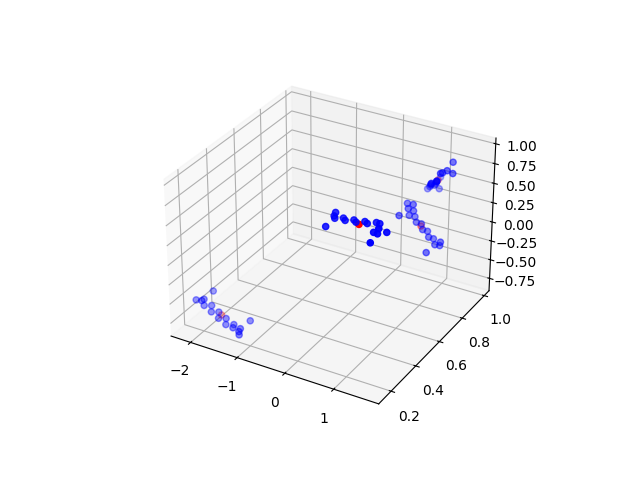

In [74]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mean_coord_frac[:, 0], mean_coord_frac[:, 1], mean_coord_frac[:, 2], c='r', marker='o')
ax.scatter(wrapped_coords_frac[:, 0], wrapped_coords_frac[:, 1], wrapped_coords_frac[:, 2], c='b', marker='o')
#ax.scatter(osda_pos_frac[:, 0], osda_pos_frac[:, 1], osda_pos_frac[:, 2], c='g', marker='o')

plt.show()